In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from itertools import product

In [64]:
N = [100]
beta = [1]
B = np.linspace(0, 1, 11)
J = np.linspace(0, 1, 11)
iters = [10_000_000]

input_set = product(N, beta, B, J, iters)

In [65]:
input_frame = pd.DataFrame(data=input_set, columns = ["N", "beta", "B", "J", "iters"])
input_frame.to_csv("../data/params.csv", index=False)

In [66]:
input_frame

,N,beta,B,J,iters
0,100,1,0.0,0.0,10000000
1,100,1,0.0,0.1,10000000
2,100,1,0.0,0.2,10000000
3,100,1,0.0,0.3,10000000
4,100,1,0.0,0.4,10000000
...,...,...,...,...,...
116,100,1,1.0,0.6,10000000
117,100,1,1.0,0.7,10000000
118,100,1,1.0,0.8,10000000
119,100,1,1.0,0.9,10000000


In [29]:
sim_data = np.loadtxt('../data/magnetization_0.csv', delimiter=',')

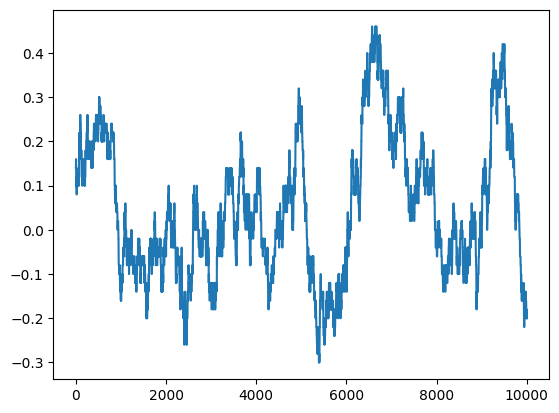

In [30]:
plt.plot(sim_data[:10000])

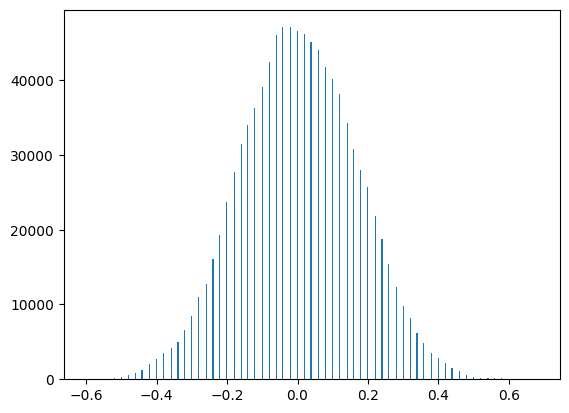

In [31]:
plt.hist(sim_data, bins=400);

In [67]:
results = pd.read_csv('../data/results.csv', delimiter=',')

In [68]:
results

,N,beta,B,J,iter,mag
0,100,1,0.0,0.0,10000000,-0.000049
1,100,1,0.0,0.1,10000000,0.000501
2,100,1,0.0,0.2,10000000,0.000589
3,100,1,0.0,0.3,10000000,-0.000138
4,100,1,0.0,0.4,10000000,-0.000885
...,...,...,...,...,...,...
116,100,1,1.0,0.6,10000000,0.968566
117,100,1,1.0,0.7,10000000,0.978914
118,100,1,1.0,0.8,10000000,0.985498
119,100,1,1.0,0.9,10000000,0.990255


In [70]:
def plot_heatmap(data, xlabels=None, ylabels=None, title=None, cmap="viridis", annot=True):
    plt.figure(figsize=(8, 6))
    
    ax = sns.heatmap(
        data,
        annot=annot,
        fmt=".2f",
        cmap=cmap,
        xticklabels=xlabels,
        yticklabels=ylabels,
        linewidths=.5,
        cbar=True
    )
    
    if title:
        ax.set_title(title, fontsize=14, pad=12)

    plt.tight_layout()
    plt.show()

In [73]:
results[["B", "J", "mag"]]

,B,J,mag
0,0.0,0.0,-0.000049
1,0.0,0.1,0.000501
2,0.0,0.2,0.000589
3,0.0,0.3,-0.000138
4,0.0,0.4,-0.000885
...,...,...,...
116,1.0,0.6,0.968566
117,1.0,0.7,0.978914
118,1.0,0.8,0.985498
119,1.0,0.9,0.990255


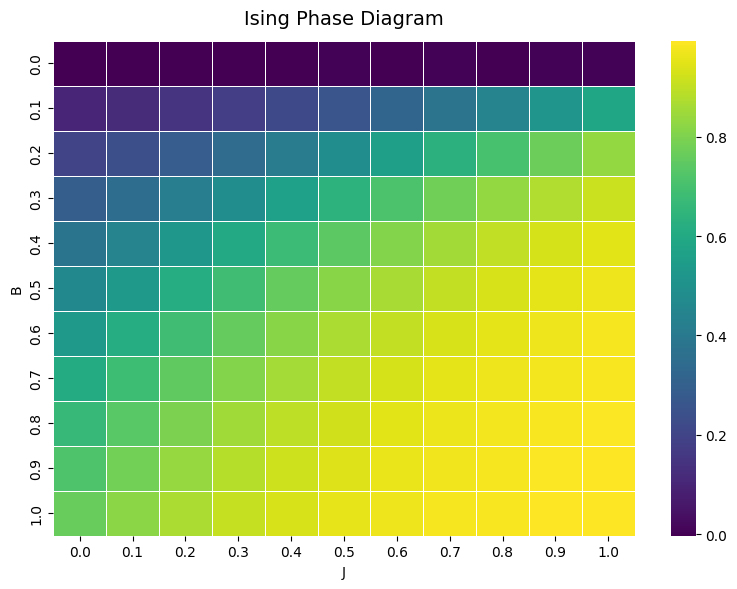

In [88]:
# Example 1: NumPy data
data = results[["B", "J", "mag"]].pivot(index="B", columns="J", values="mag")

# Example 2: Pandas DataFrame
# df = pd.DataFrame(np.random.randn(10, 8), columns=[f"C{i}" for i in range(8)])

plot_heatmap(
    data=data,
    xlabels=[col for col in data.columns],
    ylabels=[ind for ind in data.index],
    title="Ising Phase Diagram",
    annot=False
)

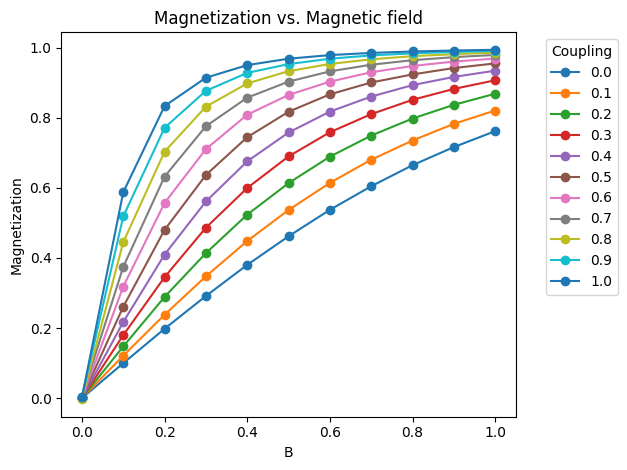

In [94]:
for col in data.columns:
    plt.plot(data.index, data[col], marker='o', label=str(col))

plt.xlabel("B")
plt.ylabel("Magnetization")
plt.title("Magnetization vs. Magnetic field")
plt.legend(title="Coupling", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

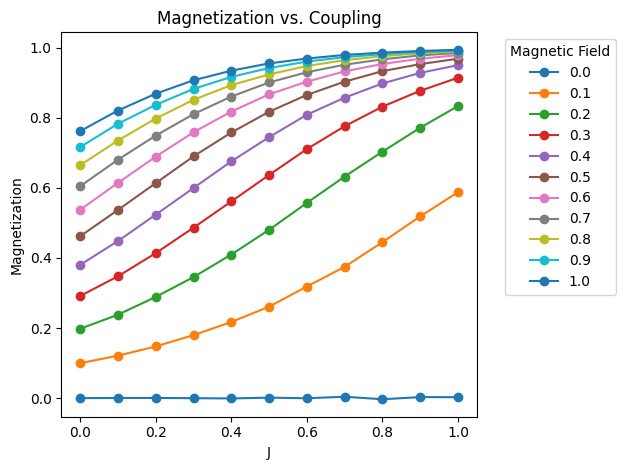

In [95]:
for row in data.index:
    plt.plot(data.columns, data.loc[row], marker='o', label=str(row))

plt.xlabel("J")
plt.ylabel("Magnetization")
plt.title("Magnetization vs. Coupling")
plt.legend(title="Magnetic Field", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
